In [2]:
#Import Libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import jaccard_score, accuracy_score, hamming_loss

In [3]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
#URL for UCI data
base_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/"

#Files to load
files = [
    'allbp.data', 'allhyper.data', 'allhypo.data', 'allrep.data', 
    'ann-train.data', 'ann-test.data', 'dis.data', 'sick.data', 
    'sick-euthyroid.data', 'thyroid0387.data'
]
column_names = [
    'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 
    'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 
    'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 
    'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 
    'referral_source', 'target', 'patient_id'
]

#Combine data from all files into one DataFrame
df = pd.DataFrame()

for file_name in files:
    file_url = base_url + file_name
    df = pd.read_csv(file_url, header=None, names=column_names, na_values='?')
    df = pd.concat([df, df], ignore_index=True)

In [5]:
column_metadata = {
    'age': {
        'Role': 'Feature',
        'Type': 'Integer',
        'Description': 'Age of the patient',
        'Units': 'years',
    },
    'sex': {
        'Role': 'Feature',
        'Type': 'Categorical',
        'Description': 'Sex the patient identifies with',
        'Units': 'category',
    },
    'on_thyroxine': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is on thyroxine medication',
        'Units': 'binary',
    },
    'query_on_thyroxine': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has queried about thyroxine medication',
        'Units': 'binary',
    },
    'on_antithyroid_meds': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is on antithyroid medications',
        'Units': 'binary',
    },
    'sick': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is currently sick',
        'Units': 'binary',
    },
    'pregnant': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is pregnant',
        'Units': 'binary',
    },
    'thyroid_surgery': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has undergone thyroid surgery',
        'Units': 'binary',
    },
    'I131_treatment': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is undergoing I131 treatment',
        'Units': 'binary',
    },
    'query_hypothyroid': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient believes they have hypothyroid',
        'Units': 'binary',
    },
    'query_hyperthyroid': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient believes they have hyperthyroid',
        'Units': 'binary',
    },
    'lithium': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient is taking lithium',
        'Units': 'binary',
    },
    'goitre': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has goitre',
        'Units': 'binary',
    },
    'tumor': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has a tumor',
        'Units': 'binary',
    },
    'hypopituitary': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has a hypopituitary condition',
        'Units': 'binary',
    },
    'psych': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether the patient has a psychiatric condition',
        'Units': 'binary',
    },
    'TSH_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether TSH level was measured',
        'Units': 'binary',
    },
    'TSH': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'TSH level in the blood',
        'Units': '',
    },
    'T3_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether T3 level was measured',
        'Units': 'binary',
    },
    'T3': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'T3 level in the blood',
        'Units': '',
    },
    'TT4_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether TT4 level was measured',
        'Units': 'binary',
    },
    'TT4': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'TT4 level in the blood',
        'Units': '',
    },
    'T4U_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'Whether T4U level was measured',
        'Units': 'binary',
    },
    'T4U': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'T4U level in blood from lab work',
        'Units': '',
    },
    'FTI_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'whether FTI was measured in the blood',
        'Units': 'binary',
    },
    'FTI': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'FTI level in blood from lab work',
        'Units': '',
    },
    'TBG_measured': {
        'Role': 'Feature',
        'Type': 'Boolean',
        'Description': 'whether TBG was measured in the blood',
        'Units': 'binary',
            },
    'TBG': {
        'Role': 'Feature',
        'Type': 'Float',
        'Description': 'TBG level in blood from lab work',
        'Units': '',
    },
    'referral_source': {
        'Role': 'Feature',
        'Type': 'String',
        'Description': '',
        'Units': '',
    },
    'target': {
        'Role': 'Target',
        'Type': 'Categorical',
        'Description': 'Diagnosed thyroid condition, encoded as letters',
        'Units': 'category',
        'Categories': {
            'A': 'hyperthyroid',
            'B': 'T3 toxic hyperthyroid',
            'C': 'toxic goitre hyperthyroid',
            'D': 'secondary toxic hyperthyroid',
            'E': 'hypothyroid',
            'F': 'primary hypothyroid',
            'G': 'compensated hypothyroid',
            'H': 'secondary hypothyroid',
            'I': 'increased binding protein',
            'J': 'decreased binding protein',
            'L': 'consistent with replacement therapy',
            'M': 'underreplaced',
            'N': 'overreplaced',
            'O': 'antithyroid drugs prescribed',
            'P': 'I131 treatment',
            'Q': 'surgery',
            'R': 'discordant assay results',
            'S': 'elevated TBG',
            'T': 'elevated thyroid hormones',  
        } 
    },
    'patient_id': {
        'Role': 'Feature',
        'Type': 'String',
        'Description': 'unique id of the patient',
        'Units': '',
    }
}

df.attrs['column_metadata'] = column_metadata 

In [6]:
print('Data Info')
display(df.info())

print('Data Head')
display(df.head())

print('Data Describe')
display(df.describe())

print("Data Types")
display(df.dtypes)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18344 entries, 0 to 18343
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  18344 non-null  int64  
 1   sex                  17730 non-null  object 
 2   on_thyroxine         18344 non-null  object 
 3   query_on_thyroxine   18344 non-null  object 
 4   on_antithyroid_meds  18344 non-null  object 
 5   sick                 18344 non-null  object 
 6   pregnant             18344 non-null  object 
 7   thyroid_surgery      18344 non-null  object 
 8   I131_treatment       18344 non-null  object 
 9   query_hypothyroid    18344 non-null  object 
 10  query_hyperthyroid   18344 non-null  object 
 11  lithium              18344 non-null  object 
 12  goitre               18344 non-null  object 
 13  tumor                18344 non-null  object 
 14  hypopituitary        18344 non-null  object 
 15  psych                18344

None

Data Head


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-[840801013],NaN
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-[840801014],NaN
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-[840801042],NaN
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-[840803046],NaN
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S[840803047],NaN


Data Describe


,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,18344.000000,16660.000000,13136.000000,17460.000000,16726.000000,16740.000000,698.000000,0.0
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,NaN
std,1183.944444,24.183280,0.887545,37.521596,0.200354,41.550408,21.065376,NaN
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,NaN
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,NaN
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,NaN
75%,68.000000,2.700000,2.300000,126.000000,1.067500,128.000000,31.000000,NaN
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,NaN


Data Types


age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id             float64
dtype: object

In [7]:
df['target'] = df['target'].str.replace(r'[\[\]0-9]', '', regex=True)

# Check the cleaned 'target' column
print(df['target'].head())

0    -
1    -
2    -
3    -
4    S
Name: target, dtype: object


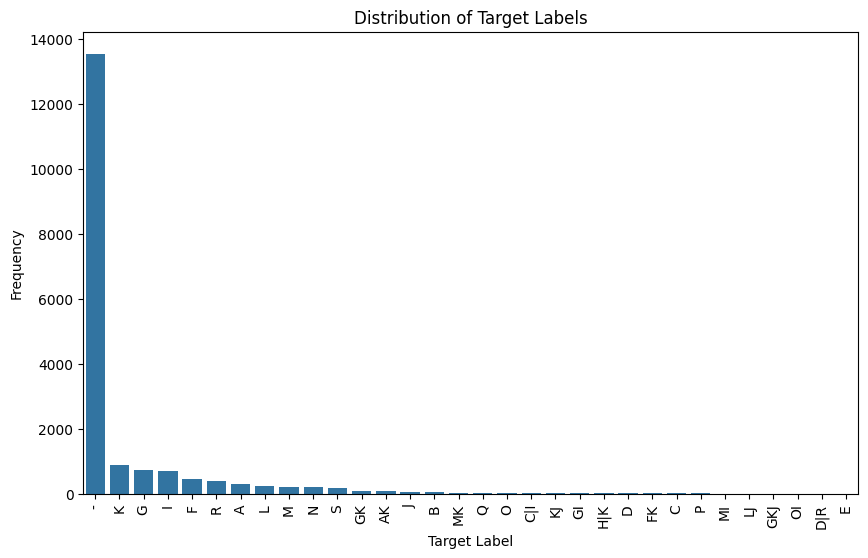

In [9]:
label_counts = df['target'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Target Labels')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('Target Label')
plt.show()

Since the variable "patient_id" contained sensitive information, it is represented in the dataframe as "NaN" and therefore can be removed from our test data for better analysis. Additionally, the variable "T3", which measures the level of T3 in the blood, contains a high volume of missing values. Therefore, we will remove it from the dataset and rely on "T3_measured" to determine the presence of T3 in bloodwork. Finally, "referral source" refers to the source hospital of the infomation and can be safely disregarded as it has no bearing on disease outcome.

In [51]:
df.drop('patient_id', axis=1, inplace=True)
df.drop('T3', axis=1, inplace=True)
df.drop('referral_source', axis=1, inplace=True)

In [52]:
#imputing variables
#Impute "sex" with mode
most_common_sex = df['sex'].mode()[0]
df['sex'] = df['sex'].fillna(most_common_sex).map({'M': 1, 'F': 0})

#Impute "TSH", "TT4", "T4U" with median 
for column in ['TSH', 'TT4', 'T4U', 'FTI', 'TBG']:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True) 

In [53]:
# Mapping 'True'/'False' to 1/0
binary_columns = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
                  'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 
                  'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured',
                  'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
for col in binary_columns:
    df[col] = df[col].map({'t': 1, 'f': 0})

In [54]:
for col in df.columns:
    # Attempt to convert the column to numeric type
    numeric_series = pd.to_numeric(df[col], errors='coerce')
    # Find non-numeric values by checking for NaN after attempted conversion
    non_numeric_values = df[col][numeric_series.isna() & df[col].notna()]
    # Print non-numeric values if any
    if not non_numeric_values.empty:
        print(f"Column '{col}' contains non-numeric values:")
        print(non_numeric_values.unique())

Column 'target' contains non-numeric values:
['-' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'KJ' 'L' 'MK' 'Q' 'J' 'C|I'
 'O' 'LJ' 'H|K' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'C' 'GKJ' 'OI' 'D|R' 'E']


In [55]:
df['target'] = df['target'].str.split('|').str[0]

#one-hot encoding
target_dummies = pd.get_dummies(df['target'], prefix='Diagnosis')

#join with the original DataFrame and drop the original 'target' column
df = df.join(target_dummies).drop('target', axis=1)

In [56]:
#'X' contains all the features except the one-hot encoded target columns
X = df.drop(columns=target_dummies.columns)

#'y' is a DataFrame that contains all the one-hot encoded target columns
y = target_dummies

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Since 'y' (disease) is a multiple classifier, we'll create a one vs rest classifier to handle data.

In [60]:
# Create the OneVsRestClassifier using MLPClassifier
ovr_classifier = OneVsRestClassifier(MLPClassifier())

# Train the classifier
ovr_classifier.fit(X_train, y_train)

# Predict on the test data
predictions = ovr_classifier.predict(X_test)

In [62]:
#initialize classifiers for comparison 
svm_classifier = OneVsRestClassifier(SVC())
logreg_classifier = OneVsRestClassifier(LogisticRegression())
rf_classifier = OneVsRestClassifier(RandomForestClassifier())

#Dictionary to hold models
classifiers = {
    "Neural Network": ovr_classifier,
    "SVM": svm_classifier,
    "Logistic Regression": logreg_classifier,
    "Random Forest": rf_classifier,
}

#Dictionary to store performance metrics for each model
performance_metrics = {
    "Jaccard Score": {},
    "Accuracy Score": {},
    "Hamming Loss": {}
}

#Train and evaluate each model
for model_name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Calculate metrics and store them in the dictionary
    performance_metrics["Jaccard Score"][model_name] = jaccard_score(y_test, y_pred, average='samples')
    performance_metrics["Accuracy Score"][model_name] = accuracy_score(y_test, y_pred)
    performance_metrics["Hamming Loss"][model_name] = hamming_loss(y_test, y_pred)

#print the performance metrics
for metric, scores in performance_metrics.items():
    print(metric)
    for model_name, score in scores.items():
        print(f"{model_name}: {score:.4f}")
    print()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Jaccard Score
Neural Network: 0.8219
SVM: 0.7536
Logistic Regression: 0.7690
Random Forest: 0.9681

Accuracy Score
Neural Network: 0.8149
SVM: 0.7536
Logistic Regression: 0.7547
Random Forest: 0.9678

Hamming Loss
Neural Network: 0.0088
SVM: 0.0162
Logistic Regression: 0.0131
Random Forest: 0.0017



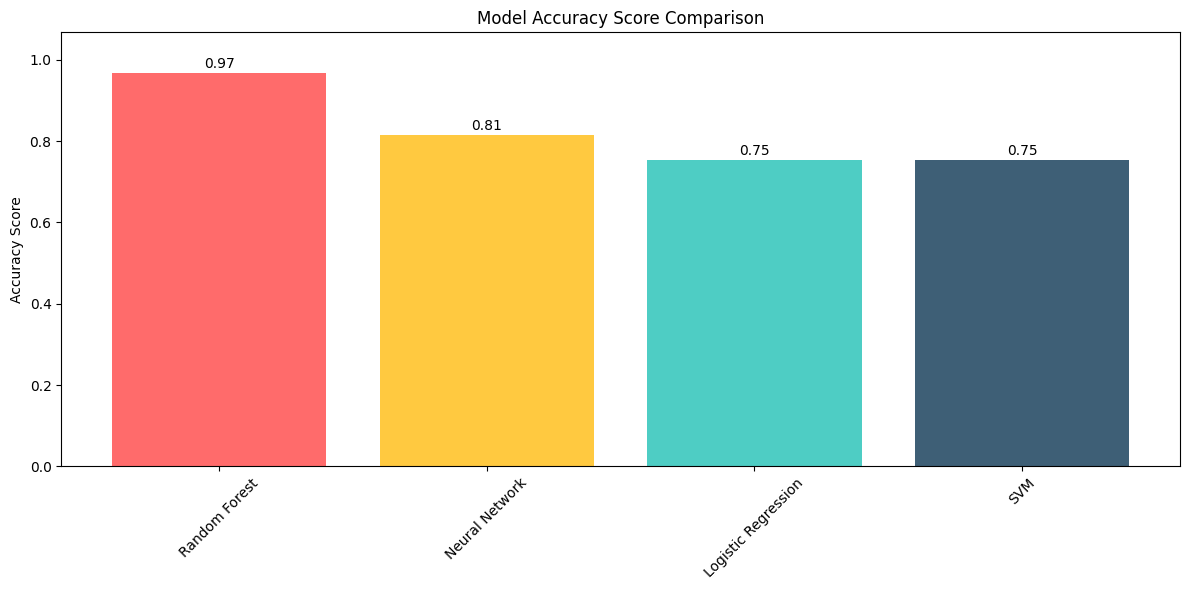

In [63]:
#plot accuracy
metric_to_plot = "Accuracy Score"
model_names = list(performance_metrics[metric_to_plot].keys())
scores = list(performance_metrics[metric_to_plot].values())

#sort models based on score
sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
sorted_models = [model_names[i] for i in sorted_indices]
sorted_scores = [scores[i] for i in sorted_indices]

colors = ["#FF6B6B", "#FFC940", "#4ECDC4", "#3E5F76", "#6D9EA0", "#D4E5E2"]

#plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_models, sorted_scores, color=colors[:len(sorted_models)])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

plt.ylabel(metric_to_plot.replace('_', ' '))
plt.title(f"Model {metric_to_plot.replace('_', ' ')} Comparison")
plt.ylim([0, max(sorted_scores) + 0.1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
